In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

## Funciones y gráficas


In [2]:
import numpy as np
def fonsecaFleming(vecx):
    try:
        assert(type(vecx)==type(np.asarray([])))
        try:
            n = vecx.shape[1]
            f1 = lambda x: -(x - 1/np.sqrt(n))**2
            f2 = lambda x: -(x + 1/np.sqrt(n))**2
            return 1-np.exp(np.sum(f1(vecx), axis=1)),1-np.exp(np.sum(f2(vecx), axis=1))
        except Exception as e:
            raise Exception("Something wrong inside calculation" + str(e))
    except Exception as e:
        raise Exception("Tipo de dato incorrecto" + str(e))

In [3]:
x=np.random.uniform(-4,4,(100000,3))
ff1,ff2=fonsecaFleming(x)

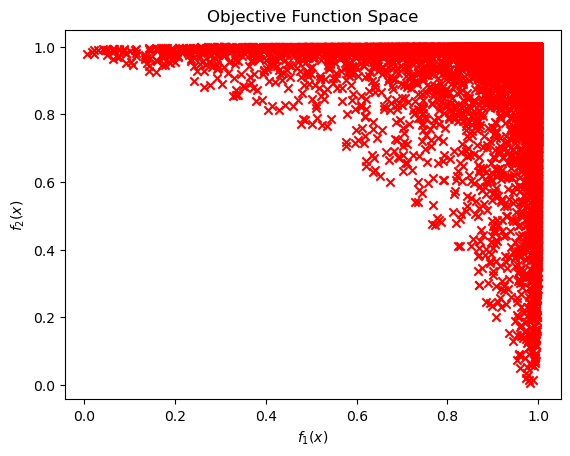

In [4]:
plt.scatter(ff1,ff2,marker="x", c="red")
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.title("Objective Function Space")
plt.show()

In [5]:
def schaeffer(vecx):
    f1= lambda x: np.power(x,2)
    f2= lambda x: np.power(x-2,2)
    return f1(vecx),f2(vecx)

In [6]:
A=-10;
n=1000;
x=np.random.uniform(-A,A,n)

In [7]:
sf1,sf2=schaeffer(x)

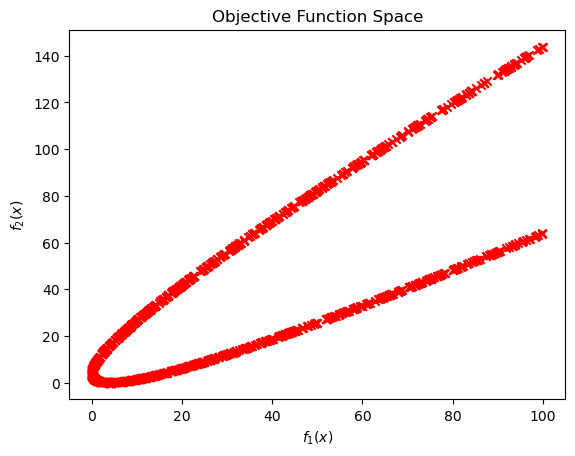

In [8]:
plt.scatter(sf1,sf2,marker="x", c="red")
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.title("Objective Function Space")
plt.show()

In [9]:

def poloni(vecx):
    try:
        assert(vecx.shape[1]==2)
        A1 = 0.5*np.sin(1) - 2*np.cos(1) + np.sin(2) - 1.5*np.cos(2);
        A2 = 1.5*np.sin(1) - np.cos(1) + 2*np.sin(2) - 0.5*np.cos(2);
        B1=lambda x,y: 0.5*np.sin(x)-2*np.cos(x)+np.sin(y)-1.5*np.cos(y)
        B2=lambda x,y: 1.5*np.sin(x)-np.cos(x)+2*np.sin(y)-0.5*np.cos(y)
        x,y=(vecx[:,0],vecx[:,1])
        p1=lambda x,y:(1 + A1 - B1(x, y)**2 + (A2 - B2(x, y))**2)
        p2=lambda x,y: (x + 3)**2 + (y + 1)**2
        return p1(x,y),p2(x,y)
    except: 
        raise Exception("La función de Poloni es válida solo para 2 variables.")

In [10]:
x=np.random.uniform(-np.pi,np.pi,(10000,2))
x.shape[1]==2
pf1,pf2=poloni(x)

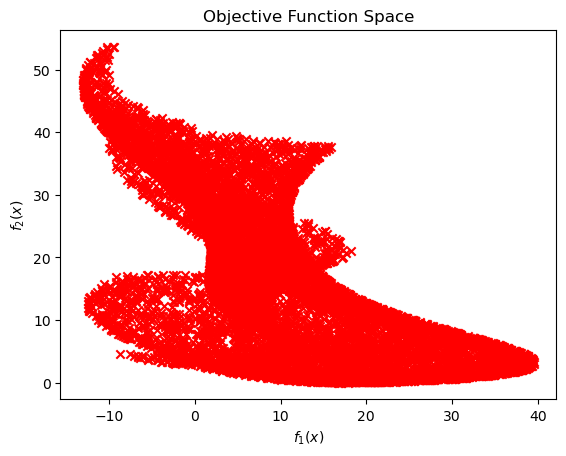

In [11]:
plt.scatter(pf1,pf2,marker="x", c="red")
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.title("Objective Function Space")
plt.show()

In [12]:
def kursawe(X):
    n=len(X)
    f2=lambda x:np.power(np.abs(x),0.8)+5*np.sin(np.power(x,3))
    f1=np.asarray([-10 * np.exp(-0.2 * np.sqrt(X[i]**2 + X[(i+1) % n]**2)) for i in range(n)])
    return f1,f2(X)

In [13]:
x=np.random.uniform(-5,5,(10000,3))

In [14]:
kf1,kf2=kursawe(x)

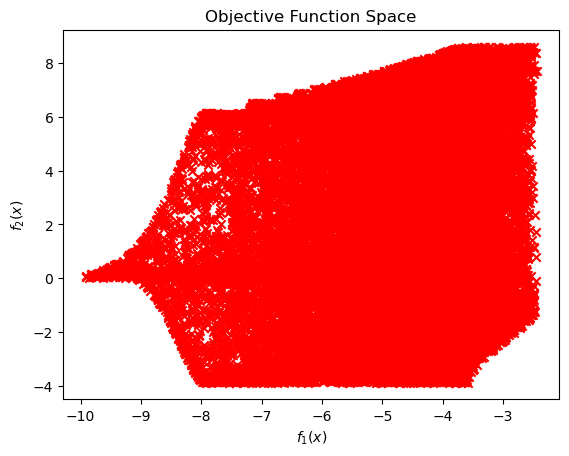

In [15]:
plt.scatter(kf1,kf2,marker="x", c="red")
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.title("Objective Function Space")
plt.show()

## Búsqueda

In [45]:
def dominates(point, other_point):
    if point[0] < other_point[0] and point[1] <= other_point[1]:
        return True
  
    elif point[0] <= other_point[0] and point[1] < other_point[1]:  
        return True

    else:
        return False
def find_dominant_points(points):
    dominants = []
    for i in range(len(points)):
        point = points[i]
        other_points = []
        for j in range(len(points)):
            if i != j:
                other_points.append(points[j])
                is_dominant = True
        for other_point in other_points:
            if dominates(other_point, point):
                is_dominant = False
                break
        if is_dominant:
            dominants.append(point)

    return np.array(dominants)

In [56]:
def dominates(point, other_point):
    return point[0] < other_point[0] and point[1] < other_point[1]

def find_dominant_points(points):
    dominants = []
    n = len(points)
    for i in range(n):
        point = points[i]
        is_dominant = True
        for j in range(n):
            if i != j and dominates(points[j], point):
                is_dominant = False
                break
        if is_dominant:
            dominants.append(point)

    return np.array(dominants)


In [57]:
x = np.random.uniform(-4, 4, (100000,  3))
ff=np.asarray(fonsecaFleming(x))
ff1,ff2=ff
strictly_dominated = find_dominant_points(np.asarray(ff.T))
strictly_dominated;

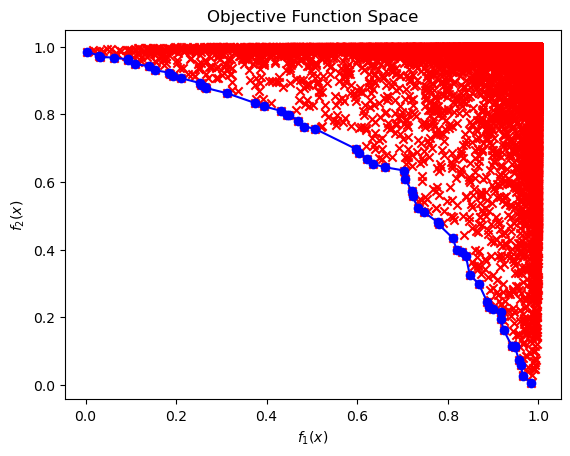

In [58]:
plt.scatter(ff1,ff2,marker="x", c="red")
strictly_dominated = np.asarray(sorted(strictly_dominated, key=lambda point: point[0]))
plt.plot(strictly_dominated.T[0],strictly_dominated.T[1],c="b",linestyle='-',marker="o")
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.title("Objective Function Space")
plt.show()